# Estimation of $\pi$ using Monte Carlo Integration

In [2]:
import jax
import jax.numpy as np
import matplotlib.pyplot as plt
import distrax
import ipywidgets as widget

try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml

key = jax.random.PRNGKey(0)

2022-05-27 09:48:56.697465: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory


In [3]:
pml.latexify(width_scale_factor=4)

/home/anand/anaconda3/lib/python3.9/site-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


/home/anand/anaconda3/lib/python3.9/site-packages/jax/_src/numpy/lax_numpy.py:4457: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax_internal._check_user_dtype_supported(dtype, "astype")


the estimated pi = 3.081600
the standard pi = 3.141593
stderr = 0.095165


/home/anand/anaconda3/lib/python3.9/site-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


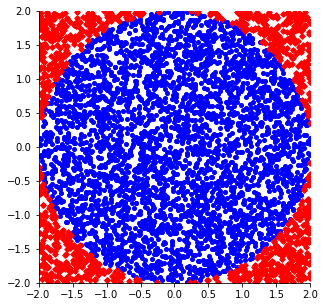

In [12]:
def estimate_pi(num_samples=5000, radius=2):
    global key
    uniform = distrax.Uniform(low=-radius, high=radius)
    x_uniform_samples = uniform.sample(seed=key, sample_shape=num_samples)
    key, subkey = jax.random.split(key)
    y_uniform_samples = uniform.sample(seed=key, sample_shape=num_samples)
    dist = x_uniform_samples**2 + y_uniform_samples**2  # distance from (0,0)

    inside = dist <= radius**2
    samples = 4 * (radius**2) * inside
    integral_estimate = np.mean(samples)
    pi_estimate = integral_estimate / (radius**2)
    std_err = np.sqrt(np.var(samples) / num_samples)

    print(("the estimated pi = %f" % pi_estimate))
    print(("the standard pi = %f" % np.pi))
    print(("stderr = %f" % std_err))

    # plot the samples
    if pml.is_latexify_enabled():
        FIG_SIZE = None
        #         fig,ax = plt.subplots()
        MARKER_SIZE = 1
    else:
        FIG_SIZE = (5, 5)
        MARKER_SIZE = 4
    fig, ax = plt.subplots(figsize=FIG_SIZE)
    ax.plot(x_uniform_samples[inside], y_uniform_samples[inside], "bo", markersize=MARKER_SIZE)
    ax.plot(x_uniform_samples[~inside], y_uniform_samples[~inside], "rD", markersize=MARKER_SIZE)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_aspect("equal")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    pml.savefig("mcEstimatePi_latexified")
    plt.show()


estimate_pi()

In [9]:
widget.interact(estimate_pi, N=(200, 20000, 10), r=(0.5, 5, 0.1))

interactive(children=(IntSlider(value=5000, description='num_samples', max=15000, min=-5000), IntSlider(value=…

<function __main__.estimate_pi(num_samples=5000, radius=2)>